<a href="https://colab.research.google.com/github/kimaelthomas2021/Stats2023/blob/main/ThomasKimael_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [3]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
#importing and defining variables

In [2]:
url = "https://docs.google.com/presentation/d/1BgSdGNOtVRdagIIwyzhTmV2G-_r6gjIXk_e7fQrMdkU/edit#slide=id.g1b006fe2e65_0_314"


In [ ]:
#importing photos from the slideshow

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [4]:
https://docs.google.com/presentation/d/1BgSdGNOtVRdagIIwyzhTmV2G-_r6gjIXk_e7fQrMdkU/edit#slide=id.g1b006fe2e65_0_314


SyntaxError: ignored

In [ ]:
#25 lizards and 25 bearded dragons

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
#50 images total, color channels, pixels 

In [ ]:
model(images)

tensor([[-2.6144, -2.4993, -2.6845,  ...,  4.2728,  3.2349, -0.7470],
        [-4.0759, -5.9215, -1.5388,  ...,  1.3166,  4.5179, -0.8449],
        [-3.0919, -6.6342, -3.2411,  ...,  0.6690,  5.9894, -3.1655],
        ...,
        [-2.3198, -2.5035, -4.6211,  ..., -5.0197,  1.5043,  1.3042],
        [-5.0579, -5.1349, -1.7295,  ..., -4.1392,  1.1328,  2.5890],
        [-3.3578, -3.8339, -2.0348,  ..., -0.3962, -0.3831,  0.9881]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus
fox squirrel, eastern fox squirrel, Sciurus niger
koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus
koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus
Scottish deerhound, deerhound
standard poodle
timber wolf, grey wolf, gray wolf, Canis lupus
fox squirrel, eastern fox squirrel, Sciurus niger
proboscis monkey, Nasalis larvatus
weasel
fox squirrel, eastern fox squirrel, Sciurus niger
three-toed sloth, ai, Bradypus tridactylus
koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus
badger
wood rabbit, cottontail, cottontail rabbit
Arctic fox, white fox, Alopex lagopus
timber wolf, grey wolf, gray wolf, Canis lupus
Arctic fox, white fox, Alopex lagopus
Arctic fox, white fox, Alopex lagopus
Arctic fox, white fox, Alopex lagopus
screen, CRT screen
Kerry blue terrier
snow leopard, ounce, Panthera uncia
Persian cat
can opener, tin opener
Border collie
giant panda, panda, 

In [ ]:
#guesses

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#first 25 are all 0, second 25 are all 1 s

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

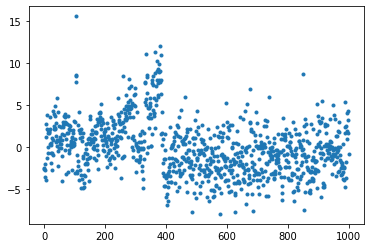

In [ ]:
plt.plot(X[0],'.')

In [ ]:
#plotting the data 

In [ ]:
X[0]

array([-2.61438799e+00, -2.49933624e+00, -2.68453908e+00, -3.56752205e+00,
       -1.96983242e+00,  2.72987628e+00,  1.24447131e+00, -3.92953110e+00,
       -1.21780336e+00,  2.19492269e+00,  3.87390280e+00, -6.76905572e-01,
        3.63442078e-02,  2.10136676e+00,  1.66577780e+00,  1.95183074e+00,
        1.75988090e+00,  1.80674493e+00,  3.60423160e+00,  4.11977440e-01,
        2.20682812e+00, -6.75022423e-01, -1.90860283e+00,  4.92345810e-01,
        2.81465441e-01, -2.66302991e+00,  1.15820980e+00, -7.29272187e-01,
       -9.29340422e-01,  4.31894398e+00,  9.14726257e-01,  3.94911289e+00,
        2.15957236e+00,  2.48062873e+00,  2.19350600e+00,  4.89572048e+00,
        3.77446628e+00,  2.32154346e+00,  1.37875378e+00,  2.92213702e+00,
        6.85085177e-01,  1.54534176e-01,  8.68967235e-01,  5.87648296e+00,
       -4.90025789e-01, -2.18635082e+00,  8.83844316e-01,  4.16281271e+00,
        2.48665190e+00, -1.08381294e-01,  6.97355151e-01,  8.16068470e-01,
        1.18118250e+00,  

In [ ]:
np.argmax(X[0])

105

In [ ]:
labels[948]

'Granny Smith'

In [ ]:
#the different types of categories that the function has

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus
titi, titi monkey
three-toed sloth, ai, Bradypus tridactylus
fox squirrel, eastern fox squirrel, Sciurus niger
indri, indris, Indri indri, Indri brevicaudatus
patas, hussar monkey, Erythrocebus patas
marmoset
baboon
guenon, guenon monkey
howler monkey, howler


In [ ]:
#the top guesses for my pictures

In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
#all the different possible guesses

(array([ 21., 129., 263., 297., 185.,  64.,  26.,  10.,   4.,   1.]),
 array([-7.9180727, -5.5669794, -3.2158856, -0.8647922,  1.4863012,
         3.8373947,  6.188488 ,  8.539581 , 10.890676 , 13.241769 ,
        15.592862 ], dtype=float32),
 <a list of 10 Patch objects>)

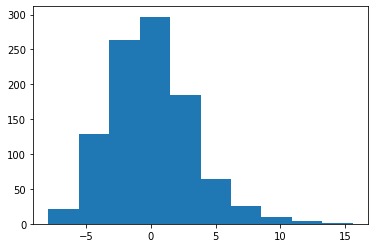

In [ ]:
plt.hist(X[0])

In [ ]:
#plotting the data

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
#defining variables

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
#defining variables

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▅▅▂▆▅▁▄▅▆▂▇▂▆▂▅▁▇▅▇▅▇▅▁▂▄█▁█▃██▅▁▁▇▅▅▄▃▁
loss,▄▅▇▃▅█▅▄▃▇▂▇▃▇▄█▂▅▂▄▂▄█▇▅▁█▁▆▁▁▄██▂▅▄▅▆█
acc_train,0.3125
loss,1.00076


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

Best run: .9688  
worst run: .312  
average: .5834